# Boundary value problem

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numbers

# First task

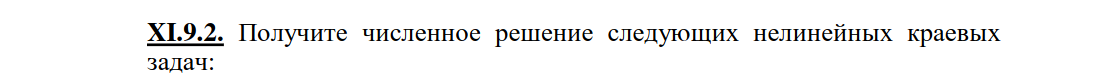
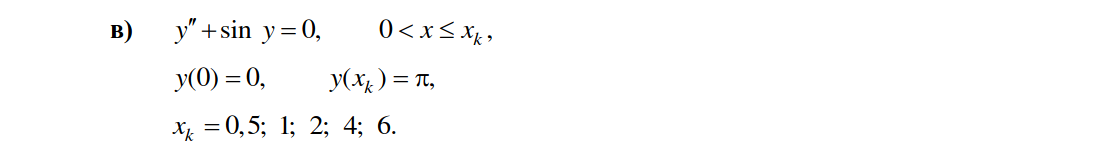

### Shooting method

Finite difference scheme: $$y_{k+1} = -\sin y_k \cdot h^2 + 2 y_k - y_{k-1},  k = 1, 2, ...$$
$$y_1 = y_0 + \lambda_n\cdot h$$
$$y_0 = 0, \lambda_0 = \frac{ y(x_k) - y(0) }{ N \cdot h } = \frac{ \pi - 0 }{ N \cdot h }$$
$\lambda_n$ is refined by dividing the segment in half.

3.1493179756792


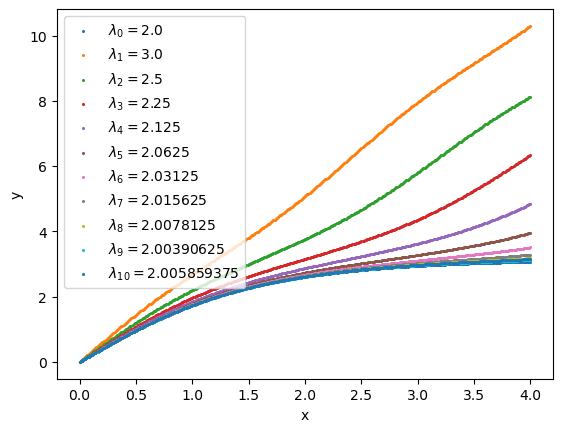

In [66]:
def drawPlot(x, y, l, n):
    plt.scatter(x, y, s = 1.5, label=f'$\lambda_{{{n}}} = {l}$')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

# Calculate array of x and y for hard-coded difference scheme.
def solveDS(l, h, xk):
    N = int(xk / h)
    
    y = np.zeros(N + 1)
    x = np.zeros(N + 1)
    
    y[0] = 0
    y[1] = l * h

    x[0] = 0
    x[1] = h
    
    for k in range(1, N):
        y[k + 1] = -np.sin(y[k]) * h * h + 2 * y[k] - y[k - 1]
        x[k + 1] = x[k] + h
    
    return x, y

# Draw the convergence of the shooting method.
def runShootingMethod():
    left = 0
    right = 4
    xk = 4
    h = 0.01

    delta_max = 0.01
    n_max = 1000

    for n in range(n_max):
        l = (right + left) / 2
        x, y = solveDS(l, h, xk)
        drawPlot(x, y, l, n)

        delta = y[-1] - np.pi
        if abs(delta) < delta_max:
            return y[-1]
            
        if delta < 0:
            left = l
        else:
            right = l

    return y[-1]

y_shoot = runShootingMethod()
print(y_shoot)
    
    

### Quasi-linearization method

Finite difference scheme:
$$\frac{ y_{k+1}^{m+1} - 2 y_k^{m+1} + y_{k-1}^{m+1} }{ h^2 } + \sin y_k^{m+1} = 0$$
$$f(y^m) = -\sin y^m, \frac{df}{dy}(y^m) = -\cos y^m$$

With Newton's linearization:
$$\frac{ y_{k+1}^{m+1} - 2 y_k^{m+1} + y_{k-1}^{m+1} }{ h^2 } + \sin y_k^{m} + \cos y_k^m \cdot (y_k^{m+1} - y_k^m) = 0$$
$$y_0^{m+1} = y(0) = 0, y_N^{m+1} = y(x_k) = \pi, x_k = 4 $$

3.141592653589793

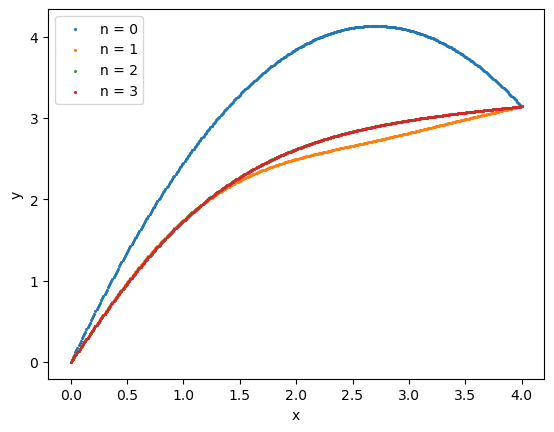

In [67]:
def drawPlot(x, y, n):
    plt.scatter(x, y, s = 1.5, label=f'n = {n}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    
# Calculate array of x and y for hard-coded Newton's linearization.
def solveQuasiLinear(y, h, xk):
    N = int(xk / h) + 1
    A = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if i == 0:
                if j == 0:
                    A[i][j] = 1
                else:
                    A[i][j] = 0
                continue

            if i == (N - 1):
                if j == (N - 1):
                    A[i][j] = 1
                else:
                    A[i][j] = 0
                continue

            if i == j:
                A[i][j] = -2/(h * h) + np.cos(y[i])
            elif (i - 1) == j or (i + 1) == j:
                A[i][j] = 1/(h * h)
            else:
                A[i][j] = 0

    f = np.zeros(N)
    f[0] = 0
    f[N - 1] = np.pi
    for i in range(1, N - 2):
        f[i] = -np.sin(y[i]) + np.cos(y[i]) * y[i]

    x = np.zeros(N)
    for i in range(N):
        x[i] = i * h
    
    return x, np.linalg.solve(A, f)

# Draw the convergence of the quasi-linear method.
def runQuasiLinearMethod():
    xk = 4
    h = 0.01
    N = int(xk / h) + 1

    delta_max = 0.01
    n_max = 1000

    y_curr = np.zeros(N)
    y_prev = np.full(N, 1.5)
    
    for n in range(n_max):
        x, y_curr = solveQuasiLinear(y_prev, h, xk)
        drawPlot(x, y_curr, n)

        if np.max(np.abs(y_curr - y_prev)) < delta_max:
            break

        y_prev = y_curr

    return y_curr[-1]

runQuasiLinearMethod()


# Second task

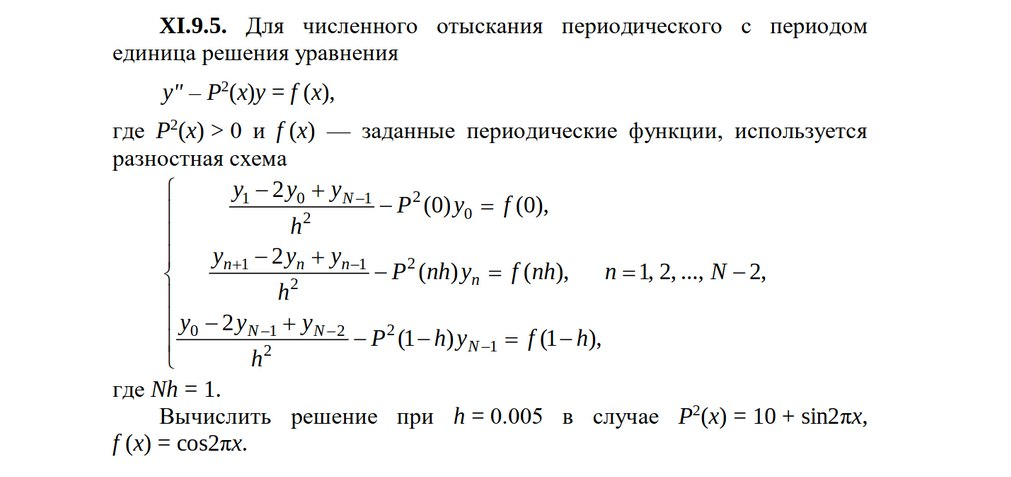

### Run-through method

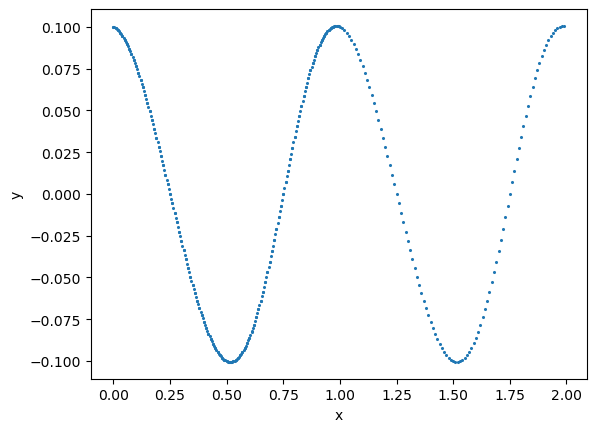

In [75]:
def drawPlot(x, y):
    plt.scatter(x, y, s = 1.5)
    plt.xlabel("x")
    plt.ylabel("y")

# Calculate array of x and y for hard-coded run-through matrix.
def solveRunThrough(h, T):
    N = int(T / h)
    
    f = lambda x: np.cos(2 * np.pi * x)
    P = lambda x: 10 + np.sin(2 * np.pi * x)

    x1 = np.zeros(N)
    x2 = np.zeros(N)
    
    A1 = np.zeros((N, N))
    A2 = np.zeros((N, N))
    
    for i in range(N):
        x1[i] = i * h
        x2[i] = i * h * 2
        
        A1[i][i] = -2 + P(x1[i])
        A2[i][i] = -2 + P(x2[i])
        
        if i != 0:
            A1[i - 1][i] = 1
            A2[i - 1][i] = 1

        if i != (N - 1):
            A1[i + 1][i] = 1
            A2[i + 1][i] = 1

    A1[-1][0] = A1[0][-1] = 1
    A2[-1][0] = A2[0][-1] = 1

    y1 = np.linalg.solve(A1, f(x1))
    y2 = np.linalg.solve(A2, f(x2))
    
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    
    return x, y

# Draw periodic solution.
def runRunThroughMethod():
    h = 0.005
    T = 1

    x, y = solveRunThrough(h, T)
    drawPlot(x, y)

runRunThroughMethod()